<a href="https://colab.research.google.com/github/yoadeoye/Heart-Diseases-Diagnosis-with-Accuracy-Based-Weighted-Average-Ensemble/blob/main/Heart_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, - - NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

---


**Source**
- This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

- Final dataset: 918 observations i.e 918 rows and 12 columns

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

- **Citation**
- fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

**Acknowledgements**
**Creators:**

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
----
**Code Reference**
1. Cdabakoglu. (2019, August 7). Heart disease - classifications (machine learning). Kaggle. https://www.kaggle.com/code/cdabakoglu/heart-disease-classifications-machine-learning

2. prashant111. (2020, March 13). Decision-tree classifier tutorial. Kaggle. https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#1.-Introduction-to-Decision-Tree-algorithm-

3. Liamarguedas. (2023, July 26). Heart attack prediction: Multi-votingclassifier. Kaggle. https://www.kaggle.com/code/liamarguedas/heart-attack-prediction-multi-votingclassifier#The-data-%F0%9F%92%BE

4. purba01. (2021, July 4). Stacked ensemble for heart disease classification. Kaggle. https://www.kaggle.com/code/purba01/stacked-ensemble-for-heart-disease-classification/notebook#12.-Model-Evaluation--

----


In [1]:
from google.colab import drive
drive.mount('g.drive')

Mounted at g.drive


### GENERAL DATA DESCRIPTION AND EXPLORATORY DATA ANALYSIS(EDA)

In [2]:

#   This dataset has been downloaded from Kaggle via the link attached above. However it contains the feature listed below:
# Attribute Information
# Age: age of the patient in [years]
# Sex: sex of the patient = [M: Male, F: Female]
# ChestPainType: chest pain type = [TA: Typical Angina, ATA: Atypical Angina, - - NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure in [mm Hg]
# Cholesterol: serum cholesterol in [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]


In [3]:
#import the necessary libaries

import sys
import os
import locale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import cross_val_score,cross_validate
# calling the metrics to be used for evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,balanced_accuracy_score
%matplotlib inline
# handles any warning prompt
import warnings
## For insignificant warnings
warnings.simplefilter(action='ignore', category=Warning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


#load data
raw_data=pd.read_csv('/content/g.drive/MyDrive/Colab Notebooks/unprccessed heart.csv')
raw_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#getting the info about the data

print("*************** GENERAL INFORMATION ABOUT THE DATASET ***************\n")
print(raw_data.info())
print("\n")
print("*************** THE NO OF ROWS AND COLUMNS PRESENT***************\n")
print(raw_data.shape)
print("\n")
print("*************** STATISTICAL DESCRIPTION OF DATASET ***************\n")
raw_data.describe().T

*************** GENERAL INFORMATION ABOUT THE DATASET ***************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


*************** THE NO OF ROWS AND COLUMNS PRESENT***************

(918, 12)


*************** STATISTICAL DESCRIPTION OF DA

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


**Observation**
* There is likelihood of large outliers in features such as RestingBP, Cholesterol as their minimum anad maximum value seem to be largely deviated and small outliers in features: MaxHR,

In [5]:
# Age: displays the age of the individual.
# Sex: displays the gender of the individual using the following format :
# 1 = male
# 0 = female

# Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
# 1 =  asymptotic
# 2 = atypical angina
# 3 = non — anginal pain
# 4 = typical angina

# Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

# Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

# Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
# If fasting blood sugar > 120mg/dl then : 1 (true)
# else : 0 (false)

# Resting ECG : displays resting electrocardiographic results
# 0 = normal
# 1 = having ST-T wave abnormality
# 2 = left ventricular hyperthrophy

# Max heart rate achieved : displays the max heart rate achieved by an individual.
# Exercise induced angina :
# 1 = yes
# 0 = no

# ST depression induced by exercise relative to rest: displays the value which is an integer or float.
# Peak exercise ST segment :
# 1 = upsloping
# 2 = flat
# 3 = downsloping

# Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
# 0 = absence
# 1, 2, 3, 4 = present.

In [6]:
print('**************FINDING THE MISSING VALUES PRESENT*************\n')
print(raw_data.isna().sum())
print('\n**************FINDING THE DUPLICATED VALUES PRESENT*************\n')
print(raw_data.duplicated().sum())


**************FINDING THE MISSING VALUES PRESENT*************

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**************FINDING THE DUPLICATED VALUES PRESENT*************

0


* **Observation**
1.  NO MISSING VALUE
2.  NO DUPLICATED VALUE





In [7]:
# changing Fasting Blood Sugar type and Target Variable to Categorical
raw_data['FastingBS']=raw_data['FastingBS'].astype('object')
raw_data['HeartDisease']=raw_data['HeartDisease'].astype('object')

In [8]:
# RENAMING THE COLUMNS NAME IN THE DATASET
raw_data.columns=['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar',
       'RestingECG', 'MaximumHeartRate', 'ExerciseAngina', 'OldPeak', 'ST_Slope',
       'HeartDisease']


In [9]:
# Decoding the values in each Column and separating the numerical and categorical features
num_cols = [i for i in raw_data.columns if raw_data[i].dtype != "object"]
cat_cols = [i for i in raw_data.columns if raw_data[i].dtype == "object"]

print(f"Observations, {raw_data.shape[0]}")
print(f"Variables, {raw_data.shape[1]}")
print(f"Categorical variables, {len(cat_cols)}")

print(f"Numerical variables, {len(num_cols)}")
print("\n")
print(f"Categorical variables, {cat_cols}")
print(f"Numerical variables, {num_cols}")

Observations, 918
Variables, 12
Categorical variables, 7
Numerical variables, 5


Categorical variables, ['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical variables, ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaximumHeartRate', 'OldPeak']


In [10]:
# checking the unique values in each feature and

for col in cat_cols:
  print("Variable: ".upper() , col)
  print(raw_data[col].value_counts())
  print('\n')


#reassigning the values in some features for better data exploration visually
# SEX
raw_data['Sex'][raw_data['Sex']=='M']='Male'
raw_data['Sex'][raw_data['Sex']=='F']='Female'

# CHEST PAIN TYPE [ASY= 'asymptomatic', NAP='non-anginal pain', ATA= 'atypical angina', TA = 'typical angina'  ]
raw_data['ChestPainType'][raw_data['ChestPainType']=='ASY']= 'Asymptomatic'
raw_data['ChestPainType'][raw_data['ChestPainType']=='NAP']= 'Non-anginal Pain'
raw_data['ChestPainType'][raw_data['ChestPainType']=='ATA']= 'Atypical Angina'
raw_data['ChestPainType'][raw_data['ChestPainType']=='TA']= 'Typical Angina'

# RestingECG [Normal: Normal, ST: ST-T wave abnormality , LVH:left ventricular hypertrophy]
raw_data['RestingECG'][raw_data['RestingECG']=='LVH']='Left ventricular hypertrophy'
raw_data['RestingECG'][raw_data['RestingECG']=='ST']='ST-T wave abnormality'


#  ExerciseAngina [exercise-induced angina??? [Y: Yes, N: No]]
raw_data['ExerciseAngina'][raw_data['ExerciseAngina']=='Y']= 'Yes'
raw_data['ExerciseAngina'][raw_data['ExerciseAngina']=='N']= 'No'

# dt["sex"] = dt.sex.apply(lambda  x:'male' if x==1 else 'female')
# duplicate the original explored data
data=raw_data.copy()


VARIABLE:  Sex
M    725
F    193
Name: Sex, dtype: int64


VARIABLE:  ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


VARIABLE:  FastingBloodSugar
0    704
1    214
Name: FastingBloodSugar, dtype: int64


VARIABLE:  RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


VARIABLE:  ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64


VARIABLE:  ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


VARIABLE:  HeartDisease
1    508
0    410
Name: HeartDisease, dtype: int64




In [11]:
# displaying the first five rows
data.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,OldPeak,ST_Slope,HeartDisease
0,40,Male,Atypical Angina,140,289,0,Normal,172,No,0.0,Up,0
1,49,Female,Non-anginal Pain,160,180,0,Normal,156,No,1.0,Flat,1
2,37,Male,Atypical Angina,130,283,0,ST-T wave abnormality,98,No,0.0,Up,0
3,48,Female,Asymptomatic,138,214,0,Normal,108,Yes,1.5,Flat,1
4,54,Male,Non-anginal Pain,150,195,0,Normal,122,No,0.0,Up,0


In [12]:
# summary statistics of categorical columns
print('# summary statistics of categorical columns'.upper())
data.describe(include =[np.object]).T


# SUMMARY STATISTICS OF CATEGORICAL COLUMNS


,count,unique,top,freq
Sex,918,2,Male,725
ChestPainType,918,4,Asymptomatic,496
FastingBloodSugar,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,No,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,1,508


In [13]:
# summary statistics of Numerical columns
print('# summary statistics of Numerical column'.upper())
data.describe(include=[np.int]).T

# SUMMARY STATISTICS OF NUMERICAL COLUMN


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBloodPressure,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaximumHeartRate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0


In [14]:
# General Data Correlation with the Target Variable: HeartDisease
# display the correlation of all variables with the target variables
print('the correlation of the numerical variables variables with the target variables \n'.upper().rjust(70))
data.corr()

THE CORRELATION OF THE NUMERICAL VARIABLES VARIABLES WITH THE TARGET VARIABLES 



,Age,RestingBloodPressure,Cholesterol,MaximumHeartRate,OldPeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBloodPressure,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaximumHeartRate,-0.382045,-0.112135,0.235792,1.000000,-0.160691
OldPeak,0.258612,0.164803,0.050148,-0.160691,1.000000


**Observation**
* Age and RestingBloodPressure,OldPeak show positive correlation
* Age and Resting Blood Sugar are positively correlated

In [15]:
countNoDisease = len(data[data.HeartDisease == 0])  #no of patients that does not have heart disease
countHaveDisease = len(data[data.HeartDisease== 1]) # no of patients that have heart disease
print("Percentage of Patients With no Heart Disease: {:.2f}%".format((countNoDisease / (len(data.HeartDisease))*100)))
print("Percentage of Patients That Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.HeartDisease))*100)))

Percentage of Patients With no Heart Disease: 44.66%
Percentage of Patients That Have Heart Disease: 55.34%


### DATA VISUALIZATION

Distribution of Heart Disease(Target Variable)

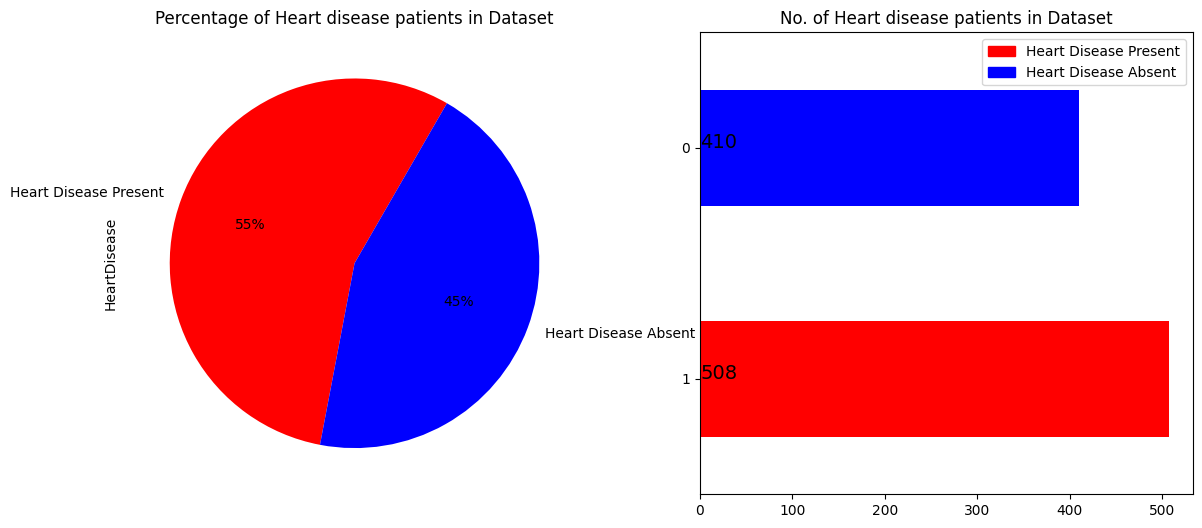

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))     # creating figures for subplot

# plots the first graph on the ax1 selected using pie chart
  # Specify colors for the pie chart
ax1 = data['HeartDisease'].value_counts().plot.pie( x="Heart disease",y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Heart Disease Present","Heart Disease Absent"], startangle = 60,ax=ax1,colors=['red','blue']);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')


# plots the first graph on the ax2 subplot selected using horizontal bar chart

ax2 = data['HeartDisease'].value_counts().plot(kind="barh" ,ax =ax2,color=['red','blue'])
for i,j in enumerate(data['HeartDisease'].value_counts().values):
    ax2.text(.5,i,j,fontsize=14)    # Adds the values to the chart
ax2.set(title = 'No. of Heart disease patients in Dataset')
# plt.show()

# Add a legend to the bar chart
colors_bar=['red','blue']
legend_labels = ["Heart Disease Present", "Heart Disease Absent"]
legend_colors = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors_bar]
ax2.legend(legend_colors, legend_labels, loc='upper right')

plt.show()

**Observation**
* More patients seem to be at risk of Heart Disease
* 508 Heart Disease Patients and 410 Normal Patients

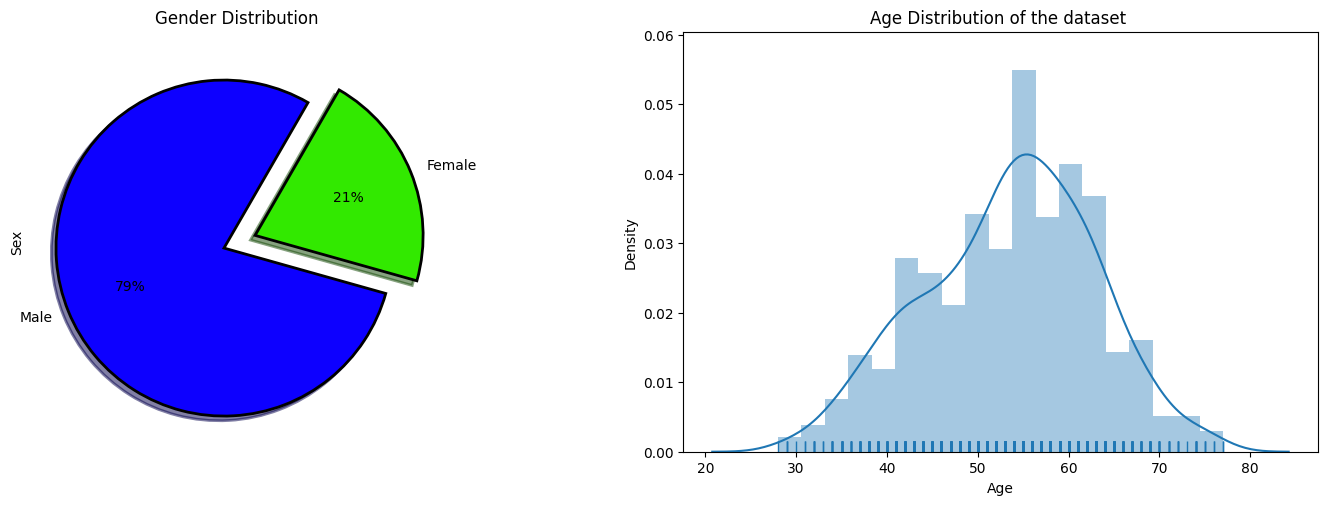

In [17]:
# Distribution of Age and Gender in the dataset


plt.figure(figsize=(18,12))   # set the figure size
plt.subplot(221) # plotting two graphs on a figure
# plots the pie chart for sex distribution
data["Sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Gender Distribution ") # shows the plot in the first column

plt.subplot(222) #sets the second column for plotting
ax= sns.distplot(data['Age'], rug=True) # plots the  distribution plot for age
plt.title("Age Distribution of the dataset ")  # labels the plot
plt.show()

**Observation**
* The Age distribution is unimodal and the average age of patients appears to be 55
* Male are more than the females in these combined dataset

### RELATIONSHIP BETWEEN THE TARGET VARIABLE AND THE CATEGORICAL VARIABLE/NUMERICAL VARIABLE

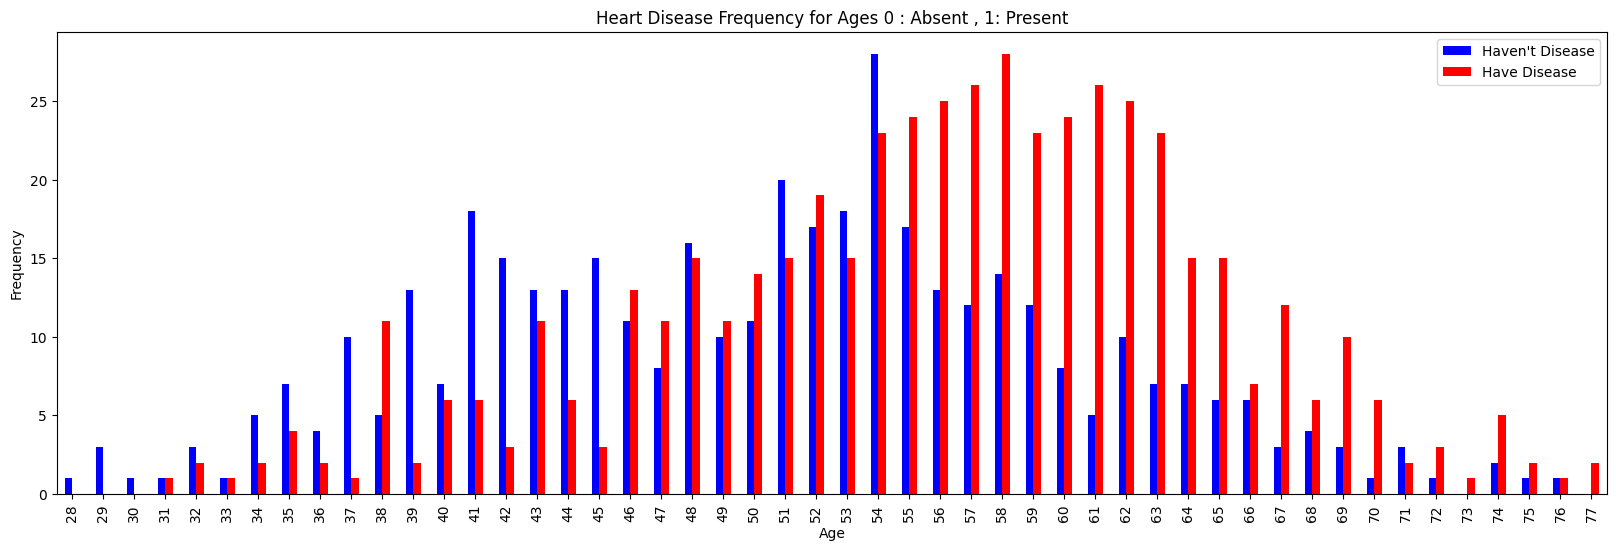

In [18]:
# Age Vs Heart Disease
pd.crosstab(data.Age,data.HeartDisease).plot(kind="bar",figsize=(20,6),color=['blue', 'red'])  # plot the data bar chart for
plt.title('Heart Disease Frequency for Ages 0 : Absent , 1: Present')   # labels the chart
plt.xlabel('Age')   #labels the xaxis
plt.ylabel('Frequency') # labels the yaxis
plt.legend(["Haven't Disease", "Have Disease"])
plt.savefig('heartDiseaseAndAges.png')   # saves the chart in picture format
plt.show()  # diplays the chart

**Observation**
* Patients at ages below 54 tend to show less risk to heart disease
* Patients at ages above 54 tend to show higher risk to heart disease
---

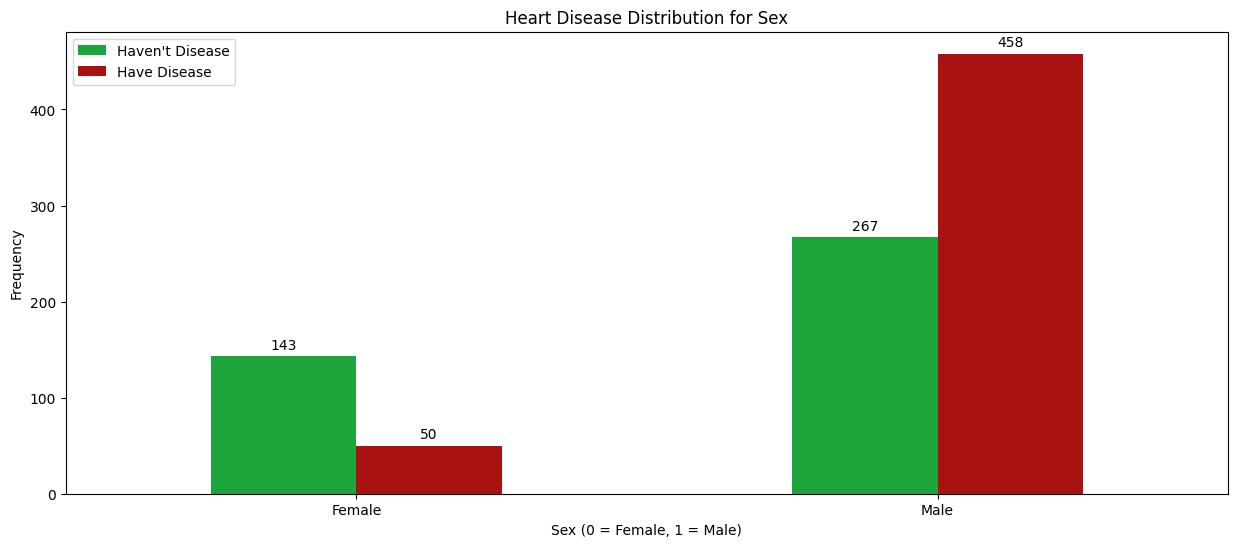

In [19]:
# Sex Vs Heart Disease Risk
ax=pd.crosstab(data.Sex,data.HeartDisease).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ]) #create the bar chart for Sex vs HeartDisease
plt.xticks(rotation=0) # rotates the xaxis horizontally
plt.legend(["Haven't Disease", "Have Disease"])  # applies legend to the chart

# Add text annotations on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    ax.annotate(f'{height}', xy=(width, height), xytext=(0, 5), textcoords='offset points', ha='center')

plt.title('Heart Disease Distribution for Sex')  # labels the heading of the plot
plt.xlabel('Sex (0 = Female, 1 = Male)')  # labels the xaxis
plt.ylabel('Frequency') #counts the heart diseases patient
plt.show()

**Observation**
* Male tend to show more risk to heart disease failure than Female(confirming evidences)

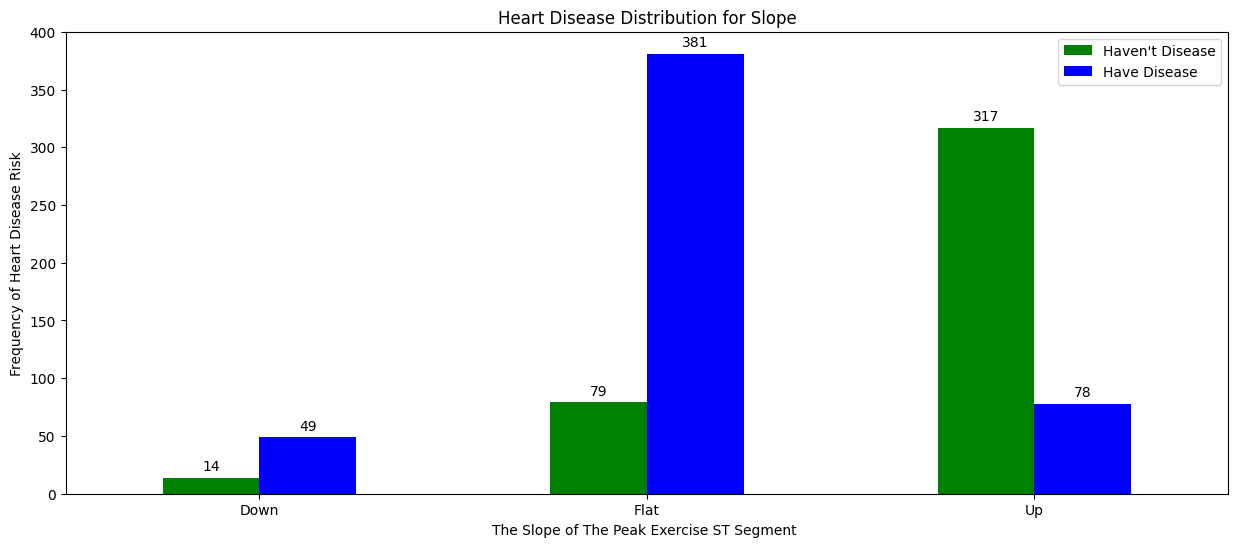

In [20]:
# ST_SLOPE VS HEART DISEASE

ax= pd.crosstab(data['ST_Slope'],data['HeartDisease']).plot(kind="bar",figsize=(15,6),color=['green','blue' ]) #plots the cross bar chart
plt.title('Heart Disease Distribution for Slope')   #titles the chart
plt.xlabel('The Slope of The Peak Exercise ST Segment ') # the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

# Add text annotations on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    ax.annotate(f'{height}', xy=(width, height), xytext=(0, 5), textcoords='offset points', ha='center')

plt.xticks(rotation = 0) # rotates the xlabel horizontally
plt.legend(["Haven't Disease", 'Have Disease'])
plt.ylabel('Frequency of Heart Disease Risk')  # labels the yaxis
plt.show() # displays the chart in the figure

**Observation**
* Patients with the slope of the peak exercise ST segment as *Flat* tend to show risk to Heart disease than *Down* and *Upslopping*
* Patients with ST_SLOPE= *Down* are less prone to Heart Disease Risk


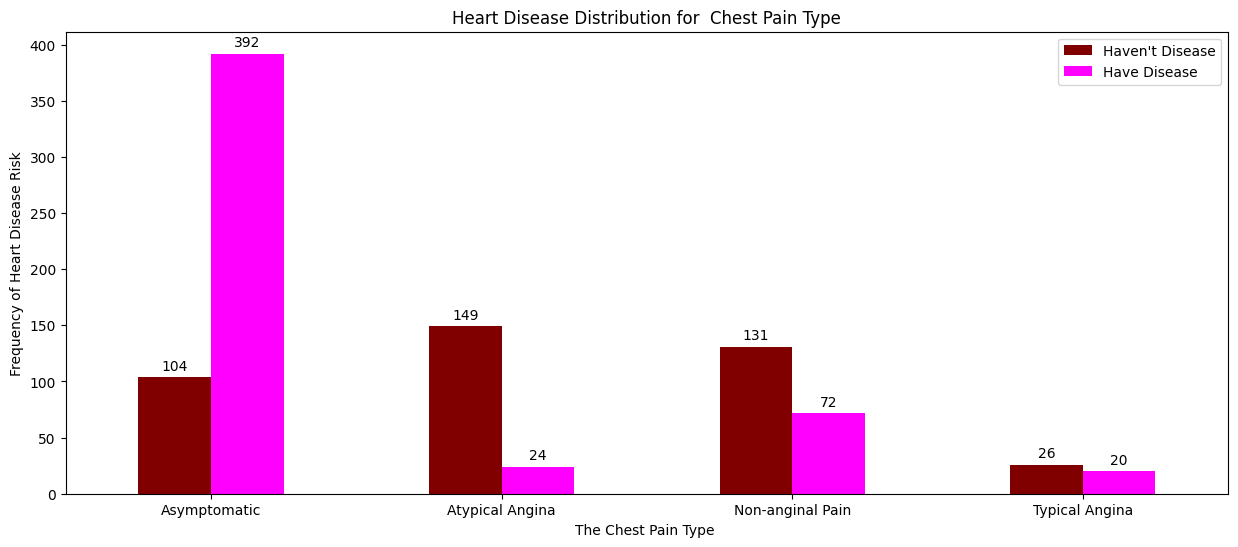

In [21]:
# CHEST PAIN TYPE VS HEART DISEASE
ax= pd.crosstab(data['ChestPainType'],data['HeartDisease']).plot(kind="bar",figsize=(15,6),color=['maroon','magenta']) #plots the cross bar chart
plt.title('Heart Disease Distribution for  Chest Pain Type')   #titles the chart
plt.xlabel('The Chest Pain Type ') # chest pain type: ATA,NAP, TA, ASY

# Add text annotations on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    ax.annotate(f'{height}', xy=(width, height), xytext=(0, 5), textcoords='offset points', ha='center')

plt.xticks(rotation = 0) # rotates the xlabel horizontally
plt.legend(["Haven't Disease", 'Have Disease'])
plt.ylabel('Frequency of Heart Disease Risk')  # labels the yaxis
plt.show() # displays the chart in the figure

**Observation**
* Patients with Asymptomatic chest pain symptoms tend to be at risk of heart diseases
* While patients with atypical angina, non-anginal and typical angina pain tend to be less prone to heart disease risk


---


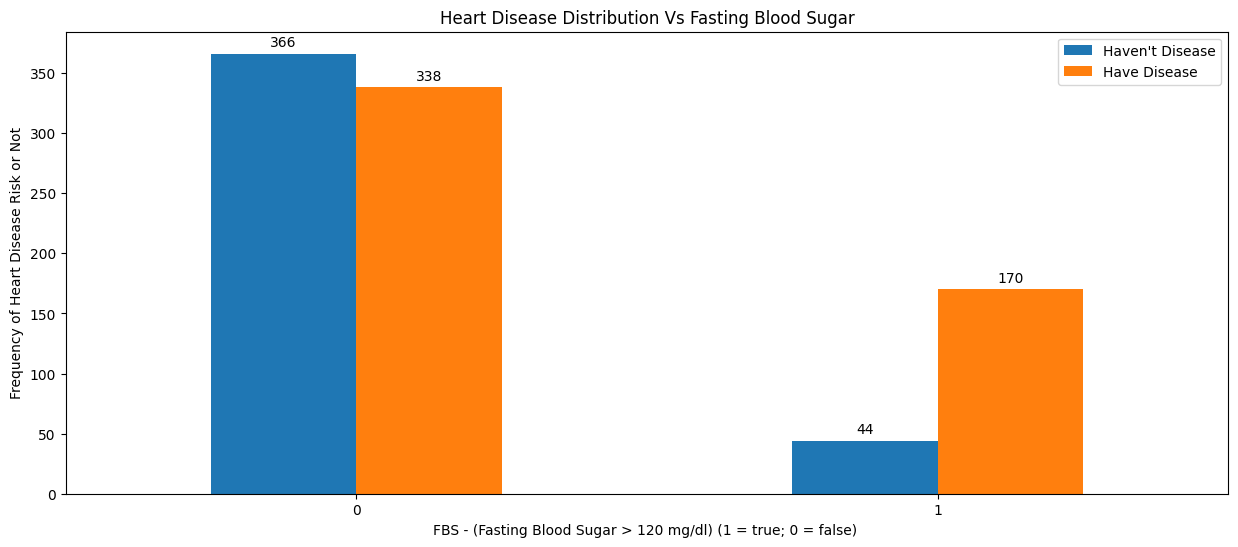

In [22]:
# FASTING BLOOD SUGAR  VS HEART DISEASE

ax= pd.crosstab(data.FastingBloodSugar,data['HeartDisease']).plot(kind="bar",figsize=(15,6)) #plots the cross bar chart
plt.title('Heart Disease Distribution Vs Fasting Blood Sugar')   #titles the chart
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false) ') # labels the xaxis


# Add text annotations on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    ax.annotate(f'{height}', xy=(width, height), xytext=(0, 5), textcoords='offset points', ha='center')

plt.xticks(rotation = 0) # rotates the xlabel horizontally
plt.legend(["Haven't Disease", 'Have Disease']) # 0 - No Heart Disease and 1- Heart Disease
plt.ylabel('Frequency of Heart Disease Risk or Not')  # labels the yaxis
plt.show() # displays the chart in the figure

**Observation**
* More Patients with Fasting Blood Sugar less than 120 mg/dl tend to be at low risk of HD while less patients with record of FBS > 120mg/dl tend to be at low heart disease risk.
* However, large percentage of patients with FBS less than 120mg/dl show record of HD risk and less patients with FBS > 120 mg/dl show record of HD
* Thus, with this data, patients with FBS < 120 mg/dl are more likely to be at risk of HD compared to patients with FBS > 120 mg/dl


---


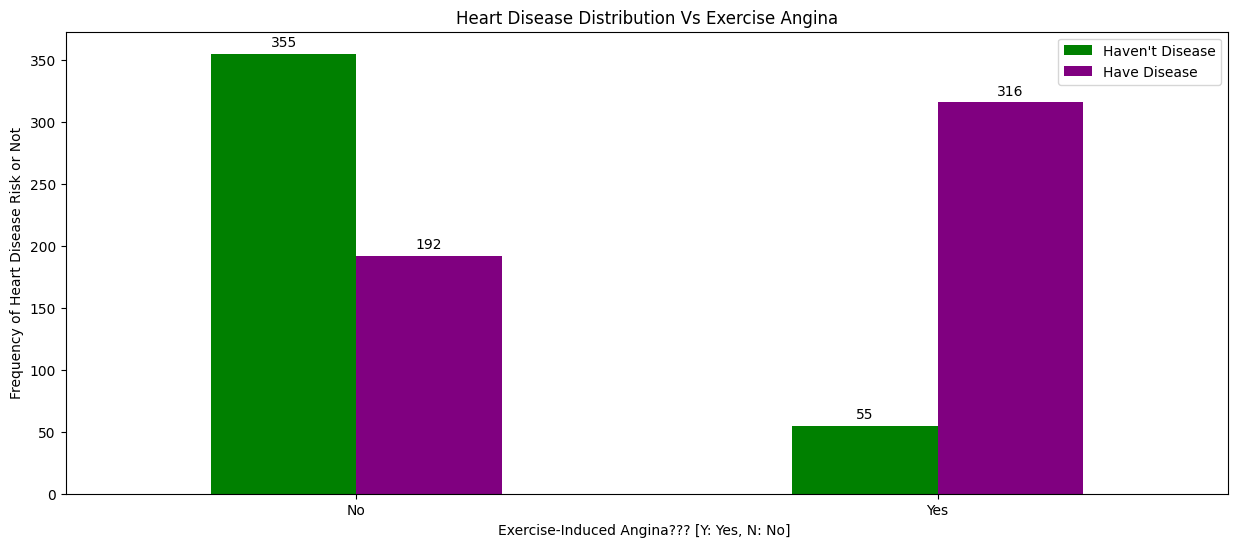

In [23]:
# EXERCISE ANGINA(chest pain induced by exercise) VS HEART DISEASE

ax= pd.crosstab(data.ExerciseAngina,data['HeartDisease']).plot(kind="bar",figsize=(15,6),color=['green','purple']) #plots the cross bar chart
plt.title('Heart Disease Distribution Vs Exercise Angina')   #titles the chart
plt.xlabel('Exercise-Induced Angina??? [Y: Yes, N: No] ') # labels the xaxis


# Add text annotations on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_x() + bar.get_width() / 2
    ax.annotate(f'{height}', xy=(width, height), xytext=(0, 5), textcoords='offset points', ha='center')

plt.xticks(rotation = 0) # rotates the xlabel horizontally
plt.legend(["Haven't Disease", 'Have Disease'])
plt.ylabel('Frequency of Heart Disease Risk or Not')  # labels the yaxis
plt.show() # displays the chart in the figure

**Observation**

---

* More Patients with exercise induced angina show more HD risk
* More Patients with no exercise induced angina show less risk to HD though few tends to show HD risk which could have been caused by other factors
* As regards, this data, there is high risk of HD if you have exercise induced angina and vice versa


---


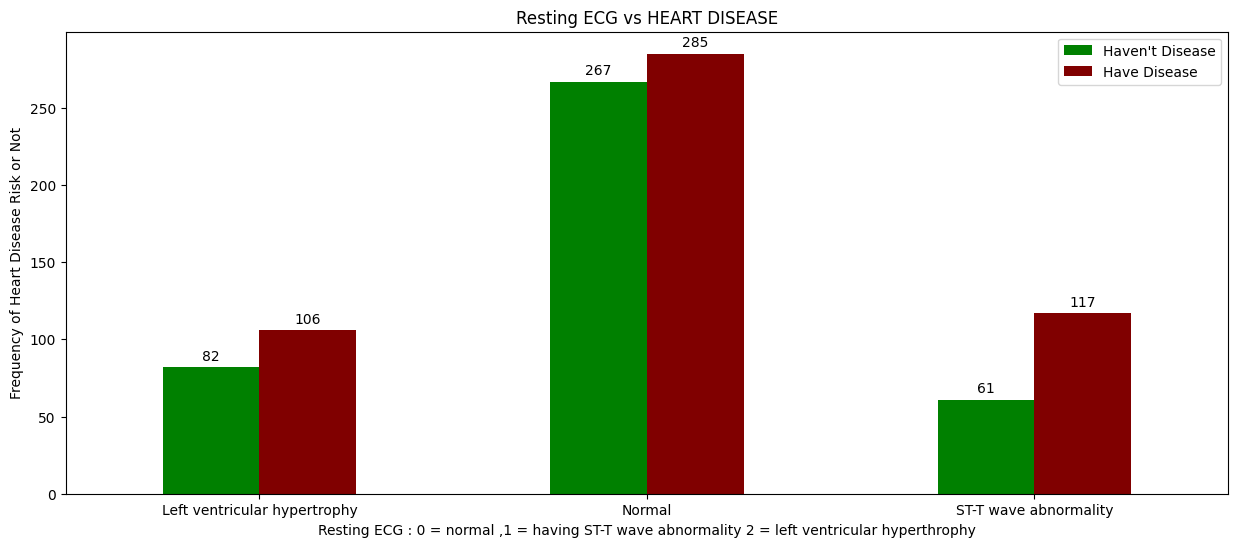

In [24]:
# Resting ECG vs HEART DISEASE
 #Resting ECG : electrocardiographic test results for HD detection etc.

ax=pd.crosstab(data.RestingECG,data.HeartDisease).plot(kind='bar',figsize=(15,6),color=['green','maroon']) # creates a crosstab for the plot
plt.title('Resting ECG vs HEART DISEASE')  # titles the bar chart
plt.xlabel('Resting ECG : 0 = normal ,1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy') # labels the xaxis

# Adding text annotation to each bar
for bar in ax.patches:
  height=bar.get_height()
  width=bar.get_x() +  bar.get_width() / 2
  ax.annotate(f'{height}', xy=(width, height), xytext=(0, 5), textcoords='offset points', ha='center')


plt.xticks(rotation = 0) # rotates the xlabel horizontally
plt.legend(["Haven't Disease", 'Have Disease'])
plt.ylabel('Frequency of Heart Disease Risk or Not')  # labels the yaxis
plt.show() # displays the chart in the figure

**Observation**
* There seem to be less correlation between the Resting ECG results and HD risk as patients with normal ECG shows the highest HD risk compared to patients with LVH and ST-T wave abnormality
* According to research,[on Kaggle by PURBA](https://www.kaggle.com/code/purba01/stacked-ensemble-for-heart-disease-classification/notebook#6.-Outlier-Detection-&-Removal-) ECG measures heart rate and rhythm, and not arteries blockages. Thus larger percentage of patients with normal ECG show more risk of HD
---


General Correlation Between Variables:

---
Though the relationship between heart disease risk and other variables have been established. However, some insights are yet to affirmed due to unclear trends between the variables. As a result, we need to establish the correlation between the variables to determine the trends that exist therein.

<Axes: title={'center': 'Correlation Matrix'}>

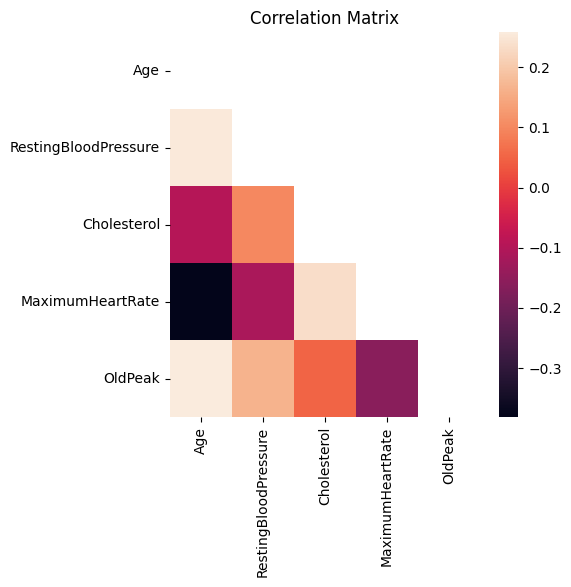

In [25]:
# General Correlations between Features
#Get the correlation matrix
corr=data.corr()

# Getting the Upper Triangle of the co-relation matrix
UpperT = np.triu(corr)
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=UpperT)


**Observation**
* There are no highly correlated features with correlation above 50%
* Heart Disease and OldPeak Chest Pain Type,ST_Slope are correlated


---


In [26]:
# defining the function for determining the correlation coefficent of features with one another
def highly_correlated(df, features, threshold=0.4):
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    correlation_df={}
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            correlation_df[corr_df.index[i] +" and "+ corr_df.columns[j]]= v
        correlation_df=pd.DataFrame(correlation_df,index=['Correlation'])
    return  correlation_df#.T.sort_values(by='Correlation',ascending=False)

#print correlation between features
highly_correlated(data,data.columns)

There are no highly correlated features with correlation above 0.4


{}

---

Finding the Trends that exist between Numerical Variables:
* ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaximumHeartRate']:*
---

In [27]:
# Using PLotly
# import the necessary module
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# stating the target variable and other features to plot
target_var ='HeartDisease'
feature_names = ['Age', 'OldPeak', 'Cholesterol']

# stating the figure layout
fig = make_subplots(rows=3, cols=1, shared_xaxes=False, shared_yaxes=False,
                    subplot_titles=[f" {target_var.capitalize()} vs. {feature.capitalize()}" for feature in feature_names])

# Iterating over the features and create a scatter plot with a regression line for each
for i, feature in enumerate(feature_names):
    n_row = i+ 1  # computes the no of rows and cols for each value of i

    try:
      # setting a scatter plot of each feature vs the target variable-median_house_value
        scatter_fig = px.scatter(data, x=feature, y=target_var, color=feature)

        # using ordinary least square parameter to create a regression line that fits across the scatter plot
        trendline_fig = px.scatter(data, x=feature, y=target_var, trendline="ols", color=feature)

        # apply the scatter plot to the each subplot
        fig.add_trace(scatter_fig.data[0], row=n_row, col=1)

        #apply the regression line to the each subplot
        fig.add_trace(trendline_fig.data[1], row=n_row, col=1)

        # set the x-axis ans y-axis labels of each subplot and include the unit price sign
        fig.update_xaxes(title_text=feature, row=n_row, col=1)
        fig.update_yaxes(title_text=target_var, row=n_row, col=1)

    except Exception as error:  # for error sake, prints the error for the feature
        print(f"Error creating plot for feature: {feature}: {error}")

        #sets the height of the figure, sets the legend and also sets the title of the whole figure
fig.update_layout(height=900, title_text="Relationship between Heart Disease Risk and The Independent Features".upper().rjust(100))
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

* Negative linear correlation exists between Heart Disease and Cholesterol
* Positive correlation observed between Heart Disease and Age, OldPeak as they increase, there is high possibility of HD risk

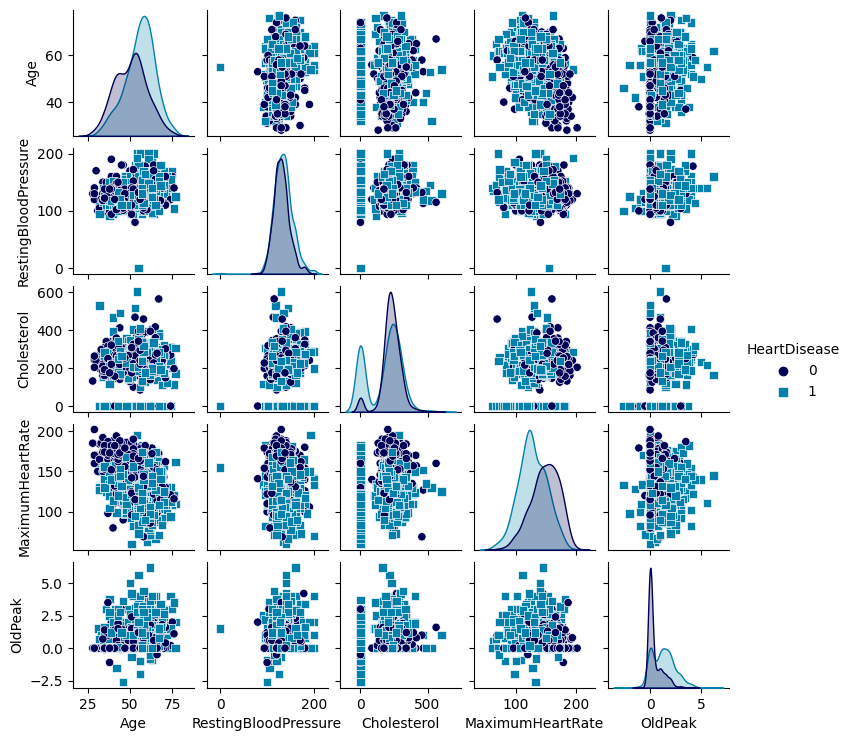

In [28]:
#general visualization of numerical variables
# num_cols.remove('HeartDisease')
# num_cols.remove('FastingBloodSugar')
sns.pairplot(data = data, vars =num_cols,
             hue = "HeartDisease", palette = "ocean",
             height = 1.5, markers = ["o", "s"]);


**Observation**
* Outliers exist in all the features but not much
* The values are normally distributed across both paired axis
*Maximum Heat and Age are negatively correlated


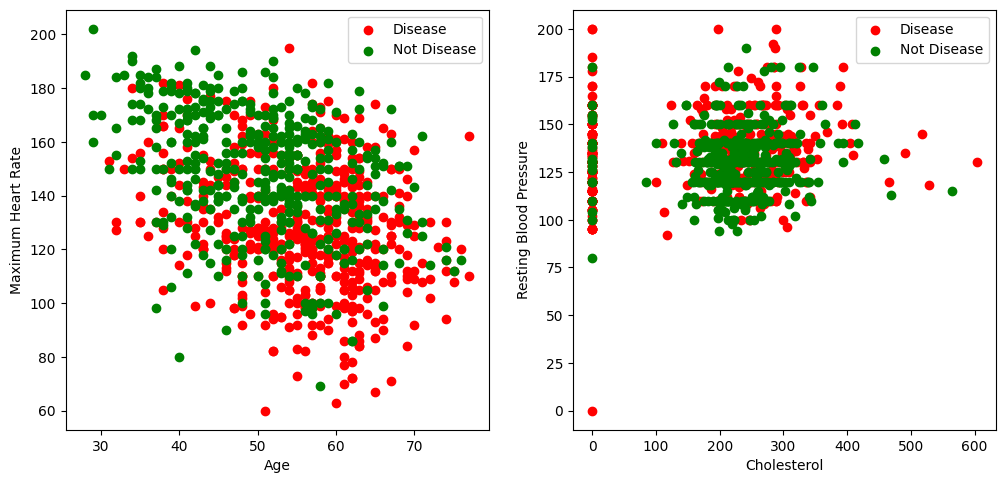

In [29]:
# relationship between AGe and Maximum Heart RAte for patients with or without Heart Disease
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.scatter(x=data.Age[data.HeartDisease==1], y=data.MaximumHeartRate[(data.HeartDisease==1)], c="red") # creates a scatter pplot between HD and Age for hd present or absent
plt.scatter(x=data.Age[data.HeartDisease==0], y=data.MaximumHeartRate[(data.HeartDisease==0)],c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age") # labels xaxis
plt.ylabel("Maximum Heart Rate") # labels the yaxis
#plt.show() # displays the chart

plt.subplot(222)
plt.scatter(x=data.Cholesterol[data.HeartDisease==1], y=data.RestingBloodPressure[(data.HeartDisease==1)], c="red") # creates a scatter pplot between HD and Age for hd present or absent
plt.scatter(x=data.Cholesterol[data.HeartDisease==0], y=data.RestingBloodPressure[(data.HeartDisease==0)],c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Cholesterol") # labels xaxis
plt.ylabel("Resting Blood Pressure") # labels the yaxis
plt.show() # displays the chart




> **Observation**
* Possible Outliers detected at cholesterol == 0



In [30]:
data[num_cols]  # viewing the numerical variables again

,Age,RestingBloodPressure,Cholesterol,MaximumHeartRate,OldPeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [31]:
# Detecting and Handling Outliers using Interquatile Range
# check for outliers

print('# Checking the Presence of Outliers'.upper())
def is_outlier(df, num_var):
  quan1 = df[num_var].quantile(0.25)  # calculates the 1st quantile
  quan3 = df[num_var].quantile(0.75)  # calculates the 3rd quantile
  interquartile_range = 1.5 * (quan3 - quan1)   # output the interquartile range
  up_limit = quan3 + interquartile_range  # outputs the upper limit
  down_limit = quan1 - interquartile_range # ouputs the lower limit
  if df[(df[num_var] < down_limit) | (df[num_var] > up_limit)].any(axis = None):
    print(f"{num_var}:".upper())
    return True
  else:
    print(f"{num_var}:")
    return False

def outlier_limit(df, num_var):
  quan1 = df[num_var].quantile(0.25)  # calculates the 1st quantile
  quan3 = df[num_var].quantile(0.75)  # calculates the 3rd quantile
  interquartile_range = 1.5 * (quan3 - quan1)   # output the interquartile range
  up_limit = quan3 + interquartile_range  # outputs the upper limit
  down_limit = quan1 - interquartile_range # ouputs the lower limit
  return up_limit,down_limit




# checking if outliers are present
for i in num_cols:
    print(is_outlier(data,i))

# CHECKING THE PRESENCE OF OUTLIERS
Age:
False
RESTINGBLOODPRESSURE:
True
CHOLESTEROL:
True
MAXIMUMHEARTRATE:
True
OLDPEAK:
True


**Observation** : OUTLIERS DETECTED IN COLUMN : RestingBloodPressure,Cholesterol, Fasting Blood Sugar, Maximum Heart Rate and Old Peak

In [32]:
# getting the total numbers of outliers
# upper and lower limit of the columns that have outliers
upp_RBP, down_RBP=outlier_limit(data, 'RestingBloodPressure')
upp_oldpeak, down_oldpeak=outlier_limit(data, 'OldPeak')
upp_chol, down_chol=outlier_limit(data, 'Cholesterol')
upp_FBP, down_FBP=outlier_limit(data, 'FastingBloodSugar')
upp_MHR, down_MHR=outlier_limit(data, 'MaximumHeartRate')


# calculatig no of outliers present in each column that has outliers
outlier_Oldpeak=np.where(data['OldPeak']>upp_oldpeak,True,
                          np.where(data['OldPeak']<down_oldpeak,True, False))  # for OldPeak

outlier_RBP=np.where(data['RestingBloodPressure']>upp_RBP,True,
                          np.where(data['RestingBloodPressure']<down_RBP,True, False)) # for RestingBloodPressure

outlier_MHR=np.where(data['MaximumHeartRate']>upp_MHR,True,
                          np.where(data['MaximumHeartRate']<down_MHR,True,False))      # for MaximumHeart Rate

outlier_FBS=np.where(data['FastingBloodSugar']>upp_FBP,True,
                          np.where(data['FastingBloodSugar']<down_chol,True, False))    # for FastingBloodSugar

outlier_Chol=np.where(data['Cholesterol']>upp_chol,True,
                          np.where(data['Cholesterol']<down_chol,True,False))            #    for Cholesterol


In [33]:
# displaying the outliers and the quantity
print(f'The feature: RestingBloodSugar has {len(data[outlier_RBP])} outliers')
print(f'The feature: OldPeak has {len(data[outlier_Oldpeak])}       outliers')
print(f'The feature: Cholesterol has {len(data[outlier_Chol])}      outliers')
print(f'The feature: MaximumHeartRate has {len(data[outlier_MHR])}  outliers')
tota_outliers=len(data[outlier_RBP])+ len(data[outlier_Oldpeak]) + len(data[outlier_Chol]) + len(data[outlier_MHR])
print('total outliers= ', tota_outliers)

The feature: RestingBloodSugar has 28 outliers
The feature: OldPeak has 16       outliers
The feature: Cholesterol has 183      outliers
The feature: MaximumHeartRate has 2  outliers
total outliers=  229


In [34]:
# CAPPING/ TRIMIMING  THE OUTLIERS

#outliers for RESTING_BLOOD_PRESSURE
upp_RBP, down_RBP=outlier_limit(data, 'RestingBloodPressure')
data['RestingBloodPressure']=np.where(data['RestingBloodPressure']>upp_RBP,upp_RBP,
                          np.where(data['RestingBloodPressure']<down_RBP,down_RBP,data['RestingBloodPressure']))

#outliers for OLD PEAK
upp_oldpeak, down_oldpeak=outlier_limit(data, 'OldPeak')
data['OldPeak']=np.where(data['OldPeak']>upp_oldpeak,upp_oldpeak,
                          np.where(data['OldPeak']<down_oldpeak,down_oldpeak,data['OldPeak']))

#outliers for Cholesterol
upp_chol, down_chol=outlier_limit(data, 'Cholesterol')
data['Cholesterol']=np.where(data['Cholesterol']>upp_chol,upp_chol,
                          np.where(data['Cholesterol']<down_chol,down_chol,data['Cholesterol']))


#outliers for MHR
upp_MHR, down_MHR=outlier_limit(data, 'MaximumHeartRate')
data['MaximumHeartRate']=np.where(data['MaximumHeartRate']>upp_MHR,upp_MHR,
                                  np.where(data['MaximumHeartRate']<down_MHR,down_MHR,data['MaximumHeartRate']))

In [35]:
data.head()    # display the first 5 rows of the data

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,OldPeak,ST_Slope,HeartDisease
0,40,Male,Atypical Angina,140.0,289.0,0,Normal,172.0,No,0.0,Up,0
1,49,Female,Non-anginal Pain,160.0,180.0,0,Normal,156.0,No,1.0,Flat,1
2,37,Male,Atypical Angina,130.0,283.0,0,ST-T wave abnormality,98.0,No,0.0,Up,0
3,48,Female,Asymptomatic,138.0,214.0,0,Normal,108.0,Yes,1.5,Flat,1
4,54,Male,Non-anginal Pain,150.0,195.0,0,Normal,122.0,No,0.0,Up,0


In [36]:
data.info()    # displaying the info for the data again to be sure of the data types to convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   918 non-null    int64  
 1   Sex                   918 non-null    object 
 2   ChestPainType         918 non-null    object 
 3   RestingBloodPressure  918 non-null    float64
 4   Cholesterol           918 non-null    float64
 5   FastingBloodSugar     918 non-null    object 
 6   RestingECG            918 non-null    object 
 7   MaximumHeartRate      918 non-null    float64
 8   ExerciseAngina        918 non-null    object 
 9   OldPeak               918 non-null    float64
 10  ST_Slope              918 non-null    object 
 11  HeartDisease          918 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 86.2+ KB


FEATURE ENGINEERING

In [37]:
#Encoding the categorical values into a numerical order form
# boolean yes or no to 1 or O respetively
data["Sex"][data['Sex']=='Male']= 1
data["Sex"][data['Sex']=='Female']= 0
data["ExerciseAngina"][data['ExerciseAngina']=='No']= 0
data["ExerciseAngina"][data['ExerciseAngina']=='Yes']= 1

In [38]:
#Mapping the Categorical Variables Using Ordinal Encoding (due to the level of severity observed
# 1 =  asymptotic
# 2 = atypical angina
# 3 = non — anginal pain
# 4 = typical angina)
data["ChestPainType"][data['ChestPainType']=='Asymptomatic']= 1
data["ChestPainType"][data['ChestPainType']=='Atypical Angina']= 2
data["ChestPainType"][data['ChestPainType']=='Non-anginal Pain']= 3
data["ChestPainType"][data['ChestPainType']=='Typical Angina']= 4


# RestingECG : 0 = normal
# 1 = having ST-T wave abnormality
# 2 = left ventricular hyperthrophy

data["RestingECG"][data['RestingECG']=='Normal']= 0
data["RestingECG"][data['RestingECG']=='ST-T wave abnormality']=1
data["RestingECG"][data['RestingECG']=='Left ventricular hypertrophy']=2


# ST_Slope [1: upsloping, 2: flat, 3: downsloping]

data["ST_Slope"][data['ST_Slope']=='Up']= 1
data["ST_Slope"][data['ST_Slope']=='Flat']= 2
data["ST_Slope"][data['ST_Slope']=='Down']= 3

# now the categorical values have been changed to numerical values but there type still remains 'object'

In [39]:
#Data TYpe Conversion
data[cat_cols]=data[cat_cols].astype('int64')
data

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,OldPeak,ST_Slope,HeartDisease
0,40,1,2,140.0,289.0,0,0,172.0,0,0.0,1,0
1,49,0,3,160.0,180.0,0,0,156.0,0,1.0,2,1
2,37,1,2,130.0,283.0,0,1,98.0,0,0.0,1,0
3,48,0,1,138.0,214.0,0,0,108.0,1,1.5,2,1
4,54,1,3,150.0,195.0,0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110.0,264.0,0,0,132.0,0,1.2,2,1
914,68,1,1,144.0,193.0,1,0,141.0,0,3.4,2,1
915,57,1,1,130.0,131.0,0,0,115.0,1,1.2,2,1
916,57,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1


Splitting the data into Train and Test

In [40]:
# timing
import time
start_time=time.time()

# Defining the target variable and the independent variable
# Sex
# ChestPainType
# RestingBloodPressure
# Cholesterol
# FastingBloodSugar
# RestingECG
# MaximumHeartRate
# ExerciseAngina
# ST_Slope
X=data.drop(['HeartDisease','Age'],axis=1) #   indeependent variable   #'Sex','RestingECG', #,'Age','OldPeak'
y=data.HeartDisease  # target variable,
#['ST_Slope','OldPeak','Cholesterol','MaximumHeartRate','ChestPainType','RestingBloodPressure','Age']
# scaling the independent variable
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

# Splitting whole  X and y into full training and testing set
from sklearn.model_selection import train_test_split

X_train_total,X_test,y_train_total,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# splitting the Full training and testing set into another training and validation set for better performance
X_train,X_valid, y_train, y_valid = train_test_split(X_train_total,y_train_total,test_size=0.33,random_state=1)

In [41]:
# checking the shape of each parameter
print('###### FOR TRAINING SET ########')
print('X_train_total.shape :', X_train_total.shape,
      '\ny_train_total.shape :', y_train_total.shape,
      '\nX_test.shape :', X_test.shape,
      '\ny_test.shape :', y_test.shape)
print('\n###### FOR VALIDATION SET ########')
# checking the shape of each parameter
print('X_train.shape :', X_train.shape,
      '\ny_train.shape :', y_train.shape,
      '\nX_valid.shape :', X_valid.shape,
      '\ny_valid.shape :', y_valid.shape)

###### FOR TRAINING SET ########
X_train_total.shape : (734, 10) 
y_train_total.shape : (734,) 
X_test.shape : (184, 10) 
y_test.shape : (184,)

###### FOR VALIDATION SET ########
X_train.shape : (491, 10) 
y_train.shape : (491,) 
X_valid.shape : (243, 10) 
y_valid.shape : (243,)


In [42]:
# importing the base models to use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


# defining a list of models to use
def get_models():
  models=[]
  models.append(('LR',LogisticRegression(random_state= 0)))
  models.append(('CART',DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split= 6)))
  models.append(('BAYES', GaussianNB(priors= None)))
  models.append(('SVM', SVC(gamma='auto', kernel='linear', probability= True)))
  models.append(('AB'   , AdaBoostClassifier(n_estimators= 100)))
  models.append(('ET'   , ExtraTreesClassifier()))
  models.append(('XGB', xgb.XGBClassifier()))
  models.append(('LDA'  , LinearDiscriminantAnalysis(n_components= 1)))
  models.append(('KNN'  , KNeighborsClassifier(n_neighbors=7)))
  models.append(('GBM'  , GradientBoostingClassifier(max_features= 8, n_estimators= 100)))
  models.append(('RF'   , RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'auto', min_samples_split= 15, n_estimators= 300)))
  return models


# defining the evaluation  of the validation sets after each model application to calculate the weight to be given each model
# accuracy score based evalution
# weight === scores

def evaluate_models(models,X_train,X_valid,y_train,y_valid):
  # call the accuracy score class
  from sklearn.metrics import accuracy_score
  names=[]  # bucket of all model names
  scores=[]  # bucket of all model scores

  for name,model in models:
    model.fit(X_train,y_train)
    # make predictions on the validation testing set
    ybar=model.predict(X_valid)
    # evaluate each model on the validation y_valid
    score=accuracy_score(ybar,y_valid)
    scores.append(score)
  return scores


In [43]:
# call the dataset

# Splitting whole  X and y into full training and testing set
from sklearn.model_selection import train_test_split
X_train_total,X_test,y_train_total,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# splitting the Full training and testing set into another training and validation set for better performance
X_train,X_valid, y_train, y_valid = train_test_split(X_train_total,y_train_total,test_size=0.33,random_state=1)

# get the models
models=get_models()

# evaluate each model on the validation sets
scores=evaluate_models(models,X_train,X_valid,y_train,y_valid)

# display each model results after evaluation
print('##### MODEL RESULT ON THE VALIDATION (X_TRAIN AND Y_VALID SET) FOR SCORING THE WEIGHT #####\n')
for i in range(len(models)):
  print('>%s: %.3f' % (models[i][0], scores[i]*100))


##### MODEL RESULT ON THE VALIDATION (X_TRAIN AND Y_VALID SET) FOR SCORING THE WEIGHT #####

>LR: 87.243
>CART: 81.070
>BAYES: 85.185
>SVM: 86.008
>AB: 84.362
>ET: 88.477
>XGB: 85.185
>LDA: 85.597
>KNN: 87.654
>GBM: 86.420
>RF: 88.889


In [44]:
from sklearn.metrics import accuracy_score

# create the  Ensemble classifier
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fitting the ensemble on the training dataset
ensemble.fit(X_train_total, y_train_total)
# make predictions on test set
y_pred_total = ensemble.predict(X_test)
# evaluate predictions based on accuracy score
score = accuracy_score(y_test, y_pred_total)
print('Weighted Avg Accuracy: %.3f' % (score*100))

Weighted Avg Accuracy: 89.674


In [45]:
print('##### MODEL RESULT ON THE FULL TRAINING SET (X_TRAIN AND Y_TRAIN SET) #####\n')
# evaluate each standalone model based on Accuracy
scores = evaluate_models(models, X_train_total, X_test, y_train_total, y_test)
for i in range(len(models)):
 print('>%s: %.3f' % (models[i][0], scores[i]*100))


##### MODEL RESULT ON THE FULL TRAINING SET (X_TRAIN AND Y_TRAIN SET) #####

>LR: 83.696
>CART: 80.978
>BAYES: 85.870
>SVM: 83.696
>AB: 84.783
>ET: 91.304
>XGB: 86.413
>LDA: 83.696
>KNN: 85.870
>GBM: 86.957
>RF: 88.587


In [46]:
# evaluate equal weighting for the ensemble based on equal contribution for each model
from sklearn.metrics import accuracy_score
ensemble = VotingClassifier(estimators=models, voting='soft') # Creates the ensemble for the Voting classifier based on Equal WEighting
ensemble.fit(X_train_total, y_train_total)   # fits the ensemble
y_pred_full_ensem= ensemble.predict(X_test)   # makes prediction on the test set
score = accuracy_score(y_test, y_pred_full_ensem)   # evaluates the model based on accuracy score
print('Voting Accuracy: %.3f' % (score*100))     # displays the
end_time=time.time()
print('Execution Time:', end_time-start_time)

Voting Accuracy: 89.130
Execution Time: 3.94598126411438


### MODEL EVALUATION WITHOUT FEATURE SELECTION AND HYPERPARAMETER TUNING
---



In [47]:
# MODEL EVALUATION
from sklearn.model_selection import cross_val_score,cross_validate
# calling the metrics to be used for evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,balanced_accuracy_score
CM=confusion_matrix(y_test, y_pred_total)
CM

array([[68,  9],
       [10, 97]])

CONFUSION MATRIX AFTER FEATURE SELECTION AND HYPERPARAMETER TUNING
#### PROPOSED MODEL RESULT AFTER FEATURE SELECTION AND HYPERARAMETER TUNING  ####
Index(['Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestingECG', 'MaximumHeartRate', 'ExerciseAngina',
       'OldPeak', 'ST_Slope'],
      dtype='object')


,MODEL,ACCURACY,BALANCED ACCURACY,SPECIFICITY,ROC SCORE,RECALL,F1 SCORE
0,WAE,0.896739,0.894829,0.883117,0.894829,0.906542,0.910798
1,LR,0.836957,0.843428,0.883117,0.843428,0.803738,0.851485
2,CART,0.809783,0.823704,0.883117,0.823704,0.738318,0.818653
3,GAUSSIAN NB,0.858696,0.860299,0.883117,0.860299,0.850467,0.875000
4,SVM,0.836957,0.843428,0.883117,0.843428,0.803738,0.851485
5,ADABOOST,0.847826,0.850953,0.883117,0.850953,0.831776,0.864078
6,EXTRA TREE,0.896739,0.896650,0.883117,0.896650,0.897196,0.909953
7,XGBOOST,0.864130,0.864971,0.883117,0.864971,0.859813,0.880383
8,LDA,0.836957,0.843428,0.883117,0.843428,0.803738,0.851485
9,KNN,0.858696,0.856657,0.883117,0.856657,0.869159,0.877358


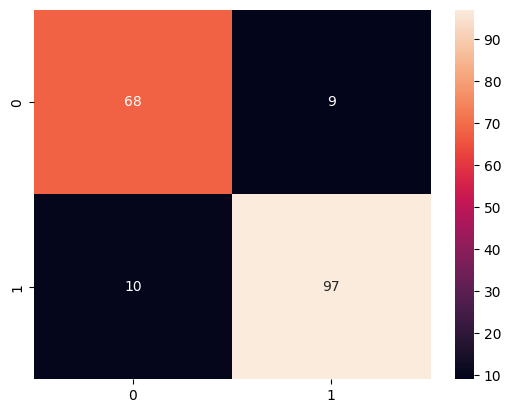

In [48]:

print('CONFUSION MATRIX AFTER FEATURE SELECTION AND HYPERPARAMETER TUNING')

sns.heatmap(CM, annot=True)  # plots the confusion matrix
TN = CM[0][0]  # True Negative
FN = CM[1][0]  # False Negative
TP = CM[1][1]  # True Positive
FP = CM[0][1]  # False Positive
bac_score_wgt=balanced_accuracy_score(y_test, y_pred_total)  #
spec_wgt = TN/(TN+FP)
acc_wgt= accuracy_score(y_test, y_pred_total)
roc_wgt=roc_auc_score(y_test, y_pred_total)
rec_wgt = recall_score(y_test, y_pred_total)
f1_wgt = f1_score(y_test, y_pred_total)


# weighted average Ensemble Results without Hyper Parameter and Feature Selection
WAE=pd.DataFrame([['WAE',acc_wgt,bac_score_wgt,spec_wgt,roc_wgt,rec_wgt,f1_wgt]],
                 columns=['MODEL', 'ACCURACY', 'BALANCED ACCURACY', 'SPECIFICITY', 'ROC SCORE','RECALL', 'F1 SCORE'])
print('#### PROPOSED MODEL RESULT AFTER FEATURE SELECTION AND HYPERARAMETER TUNING  ####')
WAE


# GETTING EACH MODEL ACCURACY BEFORE FEATURE SELECTION AND HYPER PARAMETER TUNING
ypred_lr=models[0][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_cart=models[1][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_gnb=models[2][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_svm=models[3][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_ab=models[4][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_et=models[5][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_xgb=models[6][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_lda=models[7][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_knn=models[8][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_gbm=models[9][1].fit(X_train_total,y_train_total).predict(X_test)
ypred_rf=models[10][1].fit(X_train_total,y_train_total).predict(X_test)



model_df=pd.DataFrame({'LR':ypred_lr,
          'CART':ypred_cart,
          'GAUSSIAN NB':ypred_gnb,
          'SVM':ypred_svm,
          'ADABOOST':ypred_ab,
          'EXTRA TREE':ypred_et,
          'XGBOOST':ypred_xgb,
          'LDA':ypred_lda,
          'KNN':ypred_knn,
          'GBM':ypred_gbm,
          'RF':ypred_rf})
for column in model_df:
  TN = CM[0][0]
  FN = CM[1][0]
  TP = CM[1][1]
  FP = CM[0][1]
  bac_score_wgt=balanced_accuracy_score(y_test, model_df[column])
  spec_wgt = TN/(TN+FP)
  acc_wgt= accuracy_score(y_test, model_df[column])
  roc_wgt=roc_auc_score(y_test, model_df[column])
  rec_wgt = recall_score(y_test, model_df[column])
  f1_wgt = f1_score(y_test, model_df[column])
  model_result=pd.DataFrame([[column,acc_wgt,bac_score_wgt,spec_wgt,roc_wgt,rec_wgt,f1_wgt]],
                            columns=WAE.columns)
  WAE=WAE.append(model_result,ignore_index=True)
print(X.columns)
WAE

In [49]:
# displays the TN, TP, FP, FN value
TN,TP,FP,FN

(68, 97, 9, 10)

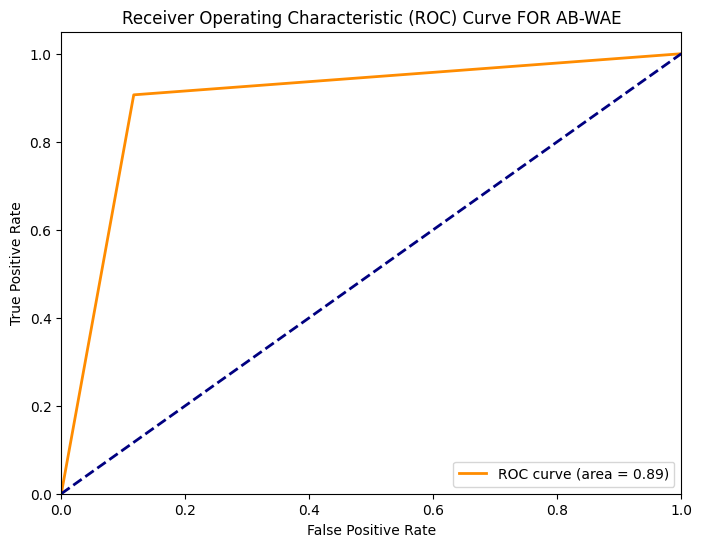

In [50]:
######ROC CURVE Authenticate our results###########
from sklearn.metrics import roc_curve, auc # importing the necessary class
# Calculate the ROC curve
# fpr - False positive rate
#tpr- True positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_total)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
# makes the plot
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])  # sets the x axes boundaries
plt.ylim([0.0, 1.05]) # sets the y axes boundaries
plt.xlabel('False Positive Rate') # labels the x axis
plt.ylabel('True Positive Rate') # labels the y  axis
plt.title('Receiver Operating Characteristic (ROC) Curve FOR AB-WAE')
plt.legend(loc='lower right')  #  positions the legend
plt.show()


In [51]:
# HYPER PARAMETER TUNING
lr_params={'random_state':[0,42, None]}
et_params={"n_estimators":[100,500,1000]}
ab_params={'n_estimators':[100,200]}
svm_params={"kernel":['linear','rbf'],"gamma":['auto',None],"probability":[True,False]}
bayes_params={'priors':[0.3, 0.7,None]}
knn_params = {"n_neighbors": range(2, 50)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300],
             "criterion":['gini','entropy']}
lda_params={'n_components':np.arange(1,10)}

xgb_params={'n_estimators':[100,200,500,1000]}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30),
               "criterion":['gini','entropy']}

gbm_params={'n_estimators':[100,200],'max_features':[8,11,'auto']}

classifiers = [('LR',LogisticRegression(),lr_params),
 ("CART", DecisionTreeClassifier(), cart_params),
  ('NB', GaussianNB(),bayes_params),
  ('SVM', SVC(),svm_params),
  ('AB',AdaBoostClassifier(),ab_params),
  ('ET',ExtraTreesClassifier(),et_params),
  ('XGB',xgb.XGBClassifier(),xgb_params),
  ('LDA', LinearDiscriminantAnalysis(),lda_params),
  ('KNN',KNeighborsClassifier(),knn_params),
  ('GBM', GradientBoostingClassifier(),gbm_params),
  ("RF", RandomForestClassifier(), rf_params)]

In [52]:
# HYPER PARAMETER TUNING OF THE FEATURES USING CROSS VALIDATION AND GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV     # for hyperparameter tuning
def hyperparameter_optimization_classification(X, y, cv=10, scoring="accuracy"): # fold ==10
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)   # 3
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

hyperparameter_optimization_classification(X, y, cv=10)  # splitting 10 times

Hyperparameter Optimization....
########## LR ##########
accuracy (Before): 0.8343
accuracy (After): 0.8343
LR best params: {'random_state': 0}

########## CART ##########
accuracy (Before): 0.7678
accuracy (After): 0.8321
CART best params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 9}

########## NB ##########
accuracy (Before): 0.8484
accuracy (After): 0.8484
NB best params: {'priors': None}

########## SVM ##########
accuracy (Before): 0.7078
accuracy (After): 0.8299
SVM best params: {'gamma': 'auto', 'kernel': 'linear', 'probability': True}

########## AB ##########
accuracy (Before): 0.8354
accuracy (After): 0.8408
AB best params: {'n_estimators': 100}

########## ET ##########
accuracy (Before): 0.8387
accuracy (After): 0.8485
ET best params: {'n_estimators': 1000}

########## XGB ##########
accuracy (Before): 0.8441
accuracy (After): 0.8441
XGB best params: {'n_estimators': 100}

########## LDA ##########
accuracy (Before): 0.8321
accuracy (After): 0.8321
LDA 

{'LR': LogisticRegression(random_state=0),
 'CART': DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9),
 'NB': GaussianNB(),
 'SVM': SVC(gamma='auto', kernel='linear', probability=True),
 'AB': AdaBoostClassifier(n_estimators=100),
 'ET': ExtraTreesClassifier(n_estimators=1000),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators

In [53]:
# FEATURE SELECTION USING FILTER AND WRAPPER METHOD


#Correlation-based Feature Selection: Select features with the highest correlation with the target variable or among themselves
n_feats=9 # to select 9 features

def cor_selector(X, y,num_feats):
    cor_list = []
    feature= X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1] # calculates the pearson correlation coefficient and the result is in index [0,1]
        cor_list.append(cor)
    # replace NaN in the correlation list with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list] #
    # feature name based on the correlation coefficients # identifies the indices of the highest corr coeff/corr with y
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-n_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_valid = [True if i in cor_feature else False for i in feature]
    return cor_valid, cor_feature

cor_valid, cor_feature = cor_selector(X, y,n_feats)
print(str(len(cor_feature)), 'selected features')


9 selected features


In [54]:
from sklearn.feature_selection import SelectKBest    # selection of features based on the use of ANOVA F test for classification
from sklearn.feature_selection import f_classif
X_scaled= MinMaxScaler().fit_transform(X)  # scales the X ; independent variables
f_selector = SelectKBest(f_classif, k=n_feats)  # create the ANOVA F test selector
f_selector.fit(X, y)
f_valid = f_selector.get_support() # validates the selection
f_feature = X.loc[:,f_valid].columns.tolist()
print(str(len(f_feature)), 'selected features')
f_feature


9 selected features


['Sex',
 'ChestPainType',
 'RestingBloodPressure',
 'Cholesterol',
 'FastingBloodSugar',
 'MaximumHeartRate',
 'ExerciseAngina',
 'OldPeak',
 'ST_Slope']

In [55]:
from sklearn.feature_selection import RFE   # based on Recursive Feature SElection with LR
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=n_feats, step=10, verbose=5)
rfe_selector.fit(X, y)  # fits the independent and target variable
rfe_valid = rfe_selector.get_support()    # checks if the feature are truly present
rfe_feature = X.loc[:,rfe_valid].columns.tolist() # use indexing to select the features
print(str(len(rfe_feature)), 'selected features')  # gives the lenght of the feature
rfe_feature                                     #displays the features

Fitting estimator with 10 features.
9 selected features


['Sex',
 'ChestPainType',
 'Cholesterol',
 'FastingBloodSugar',
 'RestingECG',
 'MaximumHeartRate',
 'ExerciseAngina',
 'OldPeak',
 'ST_Slope']

In [56]:
from sklearn.feature_selection import SelectFromModel   # based on model: logistic regression (L1 regularization)
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=n_feats)
embeded_lr_selector.fit(X, y) # fits the independent and target variable

embeded_lr_valid= embeded_lr_selector.get_support() # checks if the feature are truly present
embeded_lr_feature = X.loc[:,embeded_lr_valid].columns.tolist() # use indexing to select the features
print(str(len(embeded_lr_feature)), 'selected features') # gives the lenght of the feature
embeded_lr_feature                                        # displays the features

5 selected features


['Sex', 'ChestPainType', 'FastingBloodSugar', 'ExerciseAngina', 'ST_Slope']

In [57]:
#embedded method using Decisiion Tree
from sklearn.feature_selection import SelectFromModel # based on selection by Decisiosn Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# selects the ffeature using the set parameters
embeded_dt_selector = SelectFromModel(DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split= 2 ), max_features=n_feats)
embeded_dt_selector.fit(X, y)

embeded_dt_valid = embeded_dt_selector.get_support()  # checks if the feature are truly present
embeded_dt_feature = X.loc[:,embeded_dt_valid].columns.tolist() # use indexing to select the features
print(str(len(embeded_dt_feature)), 'selected features') # gives the length of the feature
embeded_dt_feature

2 selected features


['ChestPainType', 'ST_Slope']

In [58]:
from sklearn.feature_selection import SelectFromModel # based on selection by random  forest classifier embedded
from sklearn.ensemble import RandomForestClassifier
# select the from model the features based on parameters chosen
embeded_rf_selector = SelectFromModel(RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= n_feats, min_samples_split= 20, n_estimators= 300), max_features=n_feats)
embeded_rf_selector.fit(X, y)  # fit the model
embeded_rf_valid = embeded_rf_selector.get_support()  # if sets the feature as True else Faslse
embeded_rf_feature = X.loc[:,embeded_rf_valid].columns.tolist()  # select the features that are important to random features
print(str(len(embeded_rf_feature)), 'selected features')     # displays the length of the features
# displays the feature
embeded_rf_feature

2 selected features


['ChestPainType', 'ST_Slope']

In [59]:
# using sfs - sequential forward selection
# create a bucket  to store selected features
selected_features = []

#number of features to be selected i.e n_feats
num_features_to_select = 9

#RandomForestClassifier
clf_sfs = RandomForestClassifier (n_estimators=100,random_state=42)

# Perform Sequential Forward Selection
while len(selected_features) < num_features_to_select:
    best_accuracy = 0
    best_feature = None

    # Iterating over remaining features
    for feature_index in range(X_train_total.shape[1]):
        if feature_index not in selected_features:
            # Add the feature to the selected features
            current_features = selected_features + [feature_index]

            # Training the classifier on the current set of features
            clf_sfs.fit(X_train_total[:, current_features], y_train_total)

            # Making predictions on the test set
            y_pred =  clf_sfs.predict(X_test[:, current_features])

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Checking for  the best feature so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature_index

    # Adding the best features to the selected features bucket
    selected_features.append(best_feature)

# Print the selected features
print("Selected Features:", selected_features)
print(best_accuracy)

# filtering the features out
filtered_sfs_valid=[]
#embeded_rf_feature = X.loc[:,embeded_rf_valid].columns.tolist()
print('SElected featured Dataset'.upper())
for i,j in enumerate(X.columns):
  if i in [10, 5, 2, 1, 8, 9, 4, 7, 6]:
    filtered_sfs_valid.append(True)
    print(X.columns[i])
  else:
    filtered_sfs_valid.append(False)
filtered_sfs_valid  # displays t True if the feature is present in the selected feature and vice versa

# looking for the features
filtered_sfs_feature = X.loc[:,filtered_sfs_valid].columns.tolist()

Selected Features: [1, 5, 9, 4, 0, 2, 3, 6, 7]
0.9130434782608695
SELECTED FEATURED DATASET
ChestPainType
RestingBloodPressure
FastingBloodSugar
RestingECG
MaximumHeartRate
ExerciseAngina
OldPeak
ST_Slope


In [60]:
# put all selection together
feature_name = X.columns
# create a data fata frame for srorm
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_valid, 'f_classif':f_valid, 'RFE':embeded_rf_valid, 'Logistics':embeded_lr_valid,
                                    'Random Forest':embeded_rf_valid,'CART':embeded_dt_valid,'S-F-S':filtered_sfs_valid})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 10
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(n_feats)

,Feature,Pearson,f_classif,RFE,Logistics,Random Forest,CART,S-F-S,Total
1,ST_Slope,True,True,True,True,True,True,True,7
2,ChestPainType,True,True,True,True,True,True,True,7
3,FastingBloodSugar,True,True,False,True,False,False,True,4
4,ExerciseAngina,True,True,False,True,False,False,True,4
5,Sex,True,True,False,True,False,False,False,3
6,RestingBloodPressure,True,True,False,False,False,False,True,3
7,OldPeak,True,True,False,False,False,False,True,3
8,MaximumHeartRate,True,True,False,False,False,False,True,3
9,Cholesterol,True,True,False,False,False,False,False,2


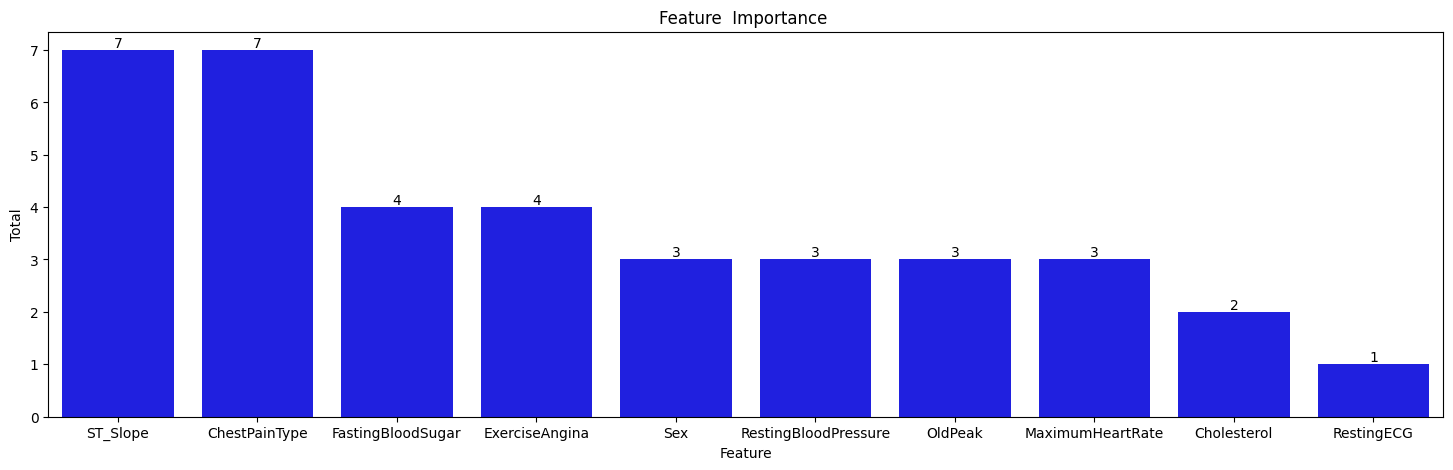

In [61]:
plt.figure(figsize=(18,5))
sns.barplot(data=feature_selection_df,x='Feature',y='Total',color='blue')   # displays the count of fetaures like in bar plot
# Add values on top of each bar
for index, value in enumerate(feature_selection_df['Total']):
    plt.text(index, value + 0.0, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Feature  Importance ')
plt.show()
sns.set()

In [62]:
import plotly.express as px

# Assume feature_selection_df is your DataFrame
# ...

fig = px.bar(feature_selection_df, x='Feature', y='Total', text='Total', height=400)

# Adjust text position
fig.update_traces(textposition='outside')

# Customize layout
fig.update_layout(
    title='Feature Selection',
    xaxis_title='Feature',
    yaxis_title='Total',
    showlegend=False  # Hide legend
)

fig.show()


**Code Reference**

---

1. Cdabakoglu. (2019, August 7). Heart disease - classifications (machine learning). Kaggle. https://www.kaggle.com/code/cdabakoglu/heart-disease-classifications-machine-learning

2. prashant111. (2020, March 13). Decision-tree classifier tutorial. Kaggle. https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial#1.-Introduction-to-Decision-Tree-algorithm-

3. Liamarguedas. (2023, July 26). Heart attack prediction: Multi-votingclassifier. Kaggle. https://www.kaggle.com/code/liamarguedas/heart-attack-prediction-multi-votingclassifier#The-data-%F0%9F%92%BE

4. purba01. (2021, July 4). Stacked ensemble for heart disease classification. Kaggle. https://www.kaggle.com/code/purba01/stacked-ensemble-for-heart-disease-classification/notebook#12.-Model-Evaluation--
---